# Pandas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Series

In [15]:
my_list = [3, 4, 6, 8]
serie = pd.Series(my_list)#,index=['a','b','c','d'], name = 'My list')

In [16]:
serie

0    3
1    4
2    6
3    8
dtype: int64

In [17]:
serie.mean()

5.25

In [18]:
serie.describe()

count    4.000000
mean     5.250000
std      2.217356
min      3.000000
25%      3.750000
50%      5.000000
75%      6.500000
max      8.000000
dtype: float64

In [19]:
alturas_dict = {'Pepe':1.8, 'Juan':1.7, 'Ana':1.65}
alturas_serie = pd.Series(alturas_dict)
alturas_serie

Pepe    1.80
Juan    1.70
Ana     1.65
dtype: float64

In [20]:
alturas_serie.iloc[1]

1.7

In [62]:
alturas_serie.loc['Pepito'] = 1.5

In [63]:
alturas_serie

Pepe      1.80
Juan      1.70
Ana       1.65
Fari      1.50
Pepito    1.50
dtype: float64

In [64]:
alturas_serie.index[np.argmin(alturas_serie)] # Quién mide menos?

'Fari'

### DataFrames

In [24]:
df = pd.DataFrame(index=range(5), columns =['1','2','3'])
df

,1,2,3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       0 non-null      object
 1   2       0 non-null      object
 2   3       0 non-null      object
dtypes: object(3)
memory usage: 248.0+ bytes


In [26]:
df = df.fillna(3)
df

,1,2,3
0,3,3,3
1,3,3,3
2,3,3,3
3,3,3,3
4,3,3,3


In [27]:
df.iloc[:,1]=1
df

,1,2,3
0,3,1,3
1,3,1,3
2,3,1,3
3,3,1,3
4,3,1,3


In [28]:
df.loc[:,'1']=2
df

,1,2,3
0,2,1,3
1,2,1,3
2,2,1,3
3,2,1,3
4,2,1,3


In [29]:
df.iloc[np.arange(4),1] = 5
df

,1,2,3
0,2,5,3
1,2,5,3
2,2,5,3
3,2,5,3
4,2,1,3


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       5 non-null      int64
 1   2       5 non-null      int64
 2   3       5 non-null      int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [31]:
df.drop(0)

,1,2,3
1,2,5,3
2,2,5,3
3,2,5,3
4,2,1,3


In [32]:
df.drop(columns=['1'])

,2,3
0,5,3
1,5,3
2,5,3
3,5,3
4,1,3


### Os module:

In [33]:
import os 
import sys
if 'google.colab' in sys.modules:
  !git clone https://github.com/HectorLob/python_tutorialak

In [34]:
os.getcwd() # Get current working directory

'/home/hector/Github/Python tutorialak'

In [35]:
os.listdir() # List directory

['Pandas.ipynb',
 '.git',
 'numpy_essentials.ipynb',
 'python_basics.ipynb',
 '.ipynb_checkpoints',
 'scipy_essentials.ipynb',
 'matplotlib_essentials.ipynb',
 'curvefit1.ipynb',
 'Data']

In [36]:
if 'google.colab' in sys.modules:
    data_path = '/content/python_tutorialak/Data'
else:
    data_path = 'Data'

file_list = os.listdir(data_path)
file_list

['ani2.gif',
 'ani.gif',
 'opt_reg.PNG',
 'curvefite1.csv',
 '.ipynb_checkpoints',
 'XP034-BX-01-30-PostProcessed.csv',
 'curvefite1.txt',
 'flower.png',
 'curvefite2.txt']

In [37]:
csv_list = [file for file in file_list if file.endswith('.csv')]
csv_list

['curvefite1.csv', 'XP034-BX-01-30-PostProcessed.csv']

In [38]:
file = 'XP034-BX-01-30-PostProcessed.csv'
file_path = os.path.join(data_path, file) # o os.path.join(path, 'Data', file)
file_path

'Data/XP034-BX-01-30-PostProcessed.csv'

In [39]:
a = pd.read_csv(file_path)
a.head(20)

,Test Name;XP034_Bx4_30-PostProcessed
0,Length_0 (A-axis);10.12;mm
1,Length_0 (B-axis);10.166;mm
2,Width (A-axis);10.166;mm
3,Width (B-axis);10.12;mm
4,Thickness;0.45;mm
5,Area (A-axis);4.5747;mm^2
6,Area (B-axis);4.553999999999999;mm^2
7,Load Cell;5N
8,Comments;-
9,Time [s];Extension (A-axis) [mm];Extension (B-...


In [40]:
df = pd.read_csv(file_path, delimiter=';', skiprows=10) 
df

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
0,0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242
1,0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265
2,0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303
3,0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283
4,0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-5.527881e-04,-6.578797e-04,0.001319,-0.005036,-5.529409e-04,-6.580962e-04,0.001318,-0.005032
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-5.527881e-04,-6.578651e-04,0.001321,-0.005035,-5.529409e-04,-6.580816e-04,0.001321,-0.005032
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-5.527881e-04,-6.578680e-04,0.001330,-0.005011,-5.529409e-04,-6.580845e-04,0.001329,-0.005008
221342,730.4154,-0.005594,-0.006688,0.006132,-0.022716,5,26.0,-5.527881e-04,-6.578826e-04,0.001340,-0.004988,-5.529409e-04,-6.580991e-04,0.001340,-0.004985


In [41]:
df.index

RangeIndex(start=0, stop=221344, step=1)

In [42]:
df.set_index('Time [s]')

,Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
Time [s],,,,,,,,,,,,,,
0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242
0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265
0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303
0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283
0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-5.527881e-04,-6.578797e-04,0.001319,-0.005036,-5.529409e-04,-6.580962e-04,0.001318,-0.005032
730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-5.527881e-04,-6.578651e-04,0.001321,-0.005035,-5.529409e-04,-6.580816e-04,0.001321,-0.005032
730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-5.527881e-04,-6.578680e-04,0.001330,-0.005011,-5.529409e-04,-6.580845e-04,0.001329,-0.005008


In [43]:
df # Lo cambia pero no guarda los cambios si no se lo decimos

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
0,0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242
1,0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265
2,0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303
3,0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283
4,0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-5.527881e-04,-6.578797e-04,0.001319,-0.005036,-5.529409e-04,-6.580962e-04,0.001318,-0.005032
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-5.527881e-04,-6.578651e-04,0.001321,-0.005035,-5.529409e-04,-6.580816e-04,0.001321,-0.005032
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-5.527881e-04,-6.578680e-04,0.001330,-0.005011,-5.529409e-04,-6.580845e-04,0.001329,-0.005008
221342,730.4154,-0.005594,-0.006688,0.006132,-0.022716,5,26.0,-5.527881e-04,-6.578826e-04,0.001340,-0.004988,-5.529409e-04,-6.580991e-04,0.001340,-0.004985


In [44]:
df.set_index('Time [s]', inplace=True)
df

# o df = df.set_index('Time [s]')

,Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
Time [s],,,,,,,,,,,,,,
0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242
0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265
0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303
0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283
0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-5.527881e-04,-6.578797e-04,0.001319,-0.005036,-5.529409e-04,-6.580962e-04,0.001318,-0.005032
730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-5.527881e-04,-6.578651e-04,0.001321,-0.005035,-5.529409e-04,-6.580816e-04,0.001321,-0.005032
730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-5.527881e-04,-6.578680e-04,0.001330,-0.005011,-5.529409e-04,-6.580845e-04,0.001329,-0.005008


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221344 entries, 0.0 to 730.4187
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Extension (A-axis) [mm]            221344 non-null  float64
 1   Extension (B-axis) [mm]            221344 non-null  float64
 2   Load (A-axis) [N]                  221344 non-null  float64
 3   Load (B-axis) [N]                  221344 non-null  float64
 4   Count Cycles                       221344 non-null  int64  
 5   Count Total Cycles                 221344 non-null  float64
 6   Engineering Strain (A-axis) [/1]   221344 non-null  float64
 7   Engineering Strain (B-axis) [/1]   221344 non-null  float64
 8   Engineering Stress (A-axis) [MPa]  221344 non-null  float64
 9   Engineering Stress (B-axis) [MPa]  221344 non-null  float64
 10  Logarithmic strain (A-axis) [/1]   221344 non-null  float64
 11  Logarithmic strain (B-axis) [/1]   22134

In [46]:
df.describe()

,Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
count,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000,221344.000000
mean,1.054103,0.945184,0.549321,0.340369,2.836887,12.563837,0.104160,0.092975,0.120078,0.074741,0.097305,0.087454,0.138777,0.085271
std,0.669638,0.600515,0.579784,0.364472,1.426446,7.277273,0.066170,0.059071,0.126737,0.080033,0.059560,0.053733,0.150975,0.093454
min,-0.008146,-0.006733,-0.007496,-0.024472,0.000000,1.000000,-0.000805,-0.000662,-0.001638,-0.005374,-0.000805,-0.000663,-0.001639,-0.005373
25%,0.490870,0.440177,0.033936,0.004514,2.000000,6.000000,0.048505,0.043299,0.007418,0.000991,0.047365,0.042388,0.007765,0.001030
50%,0.986635,0.884713,0.353698,0.232823,3.000000,12.250000,0.097494,0.087027,0.077316,0.051125,0.093029,0.083446,0.084631,0.055507
75%,1.577072,1.413011,0.918234,0.590347,4.000000,18.750000,0.155837,0.138994,0.200720,0.129633,0.144825,0.130145,0.229674,0.145951
max,2.447295,2.189390,2.385836,1.491037,5.000000,26.000000,0.241828,0.215364,0.521528,0.327413,0.216584,0.195044,0.634396,0.391180


In [47]:
df.isnull().sum()

Extension (A-axis) [mm]              0
Extension (B-axis) [mm]              0
Load (A-axis) [N]                    0
Load (B-axis) [N]                    0
Count Cycles                         0
Count Total Cycles                   0
Engineering Strain (A-axis) [/1]     0
Engineering Strain (B-axis) [/1]     0
Engineering Stress (A-axis) [MPa]    0
Engineering Stress (B-axis) [MPa]    0
Logarithmic strain (A-axis) [/1]     0
Logarithmic strain (B-axis) [/1]     0
Cauchy stress (A-axis) [MPa]         0
Cauchy stress (B-axis) [MPa]         0
dtype: int64

In [48]:
df.reset_index(inplace=True)
df

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
0,0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242
1,0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265
2,0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303
3,0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283
4,0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-5.527881e-04,-6.578797e-04,0.001319,-0.005036,-5.529409e-04,-6.580962e-04,0.001318,-0.005032
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-5.527881e-04,-6.578651e-04,0.001321,-0.005035,-5.529409e-04,-6.580816e-04,0.001321,-0.005032
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-5.527881e-04,-6.578680e-04,0.001330,-0.005011,-5.529409e-04,-6.580845e-04,0.001329,-0.005008
221342,730.4154,-0.005594,-0.006688,0.006132,-0.022716,5,26.0,-5.527881e-04,-6.578826e-04,0.001340,-0.004988,-5.529409e-04,-6.580991e-04,0.001340,-0.004985


In [49]:
df.loc[0]

Time [s]                             0.000000e+00
Extension (A-axis) [mm]              6.769149e-05
Extension (B-axis) [mm]             -1.903254e-06
Load (A-axis) [N]                    1.031086e-03
Load (B-axis) [N]                    1.102565e-03
Count Cycles                         1.000000e+00
Count Total Cycles                   1.000000e+00
Engineering Strain (A-axis) [/1]     6.688882e-06
Engineering Strain (B-axis) [/1]    -1.872176e-07
Engineering Stress (A-axis) [MPa]    2.253887e-04
Engineering Stress (B-axis) [MPa]    2.421091e-04
Logarithmic strain (A-axis) [/1]     6.688860e-06
Logarithmic strain (B-axis) [/1]    -1.872176e-07
Cauchy stress (A-axis) [MPa]         2.253902e-04
Cauchy stress (B-axis) [MPa]         2.421091e-04
Name: 0, dtype: float64

In [50]:
df.loc[[0,1,6]]

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
0,0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,0.000007,-1.872176e-07,0.000225,0.000242,0.000007,-1.872176e-07,0.000225,0.000242
1,0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,0.000017,-1.872176e-07,0.000237,0.000265,0.000017,-1.872176e-07,0.000237,0.000265
6,0.0198,-0.000059,-0.000002,0.000988,0.001008,1,1.0,-0.000006,-1.872176e-07,0.000216,0.000221,-0.000006,-1.872176e-07,0.000216,0.000221


In [51]:
df.loc[np.arange(4,25,2)]

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
4,0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
6,0.0198,-0.000059,-0.000002,0.000988,0.001008,1,1.0,-5.794191e-06,-1.872176e-07,0.000216,0.000221,-5.794208e-06,-1.872176e-07,0.000216,0.000221
8,0.0264,0.000019,-0.000002,0.001111,0.001070,1,1.0,1.920473e-06,-1.872176e-07,0.000243,0.000235,1.920471e-06,-1.872176e-07,0.000243,0.000235
10,0.0330,-0.000007,-0.000002,0.001088,0.001114,1,1.0,-6.718378e-07,-1.872176e-07,0.000238,0.000245,-6.718380e-07,-1.872176e-07,0.000238,0.000245
12,0.0396,-0.000003,-0.000002,0.001077,0.001141,1,1.0,-2.752896e-07,-1.872176e-07,0.000235,0.000251,-2.752897e-07,-1.872176e-07,0.000235,0.000251
14,0.0462,-0.000001,-0.000002,0.001113,0.001170,1,1.0,-1.015950e-07,-1.872176e-07,0.000243,0.000257,-1.015950e-07,-1.872176e-07,0.000243,0.000257
16,0.0528,-0.000003,-0.000002,0.001106,0.001088,1,1.0,-2.523488e-07,-1.872176e-07,0.000242,0.000239,-2.523488e-07,-1.872176e-07,0.000242,0.000239
18,0.0594,-0.000002,-0.000002,0.001053,0.001179,1,1.0,-1.999127e-07,-1.872176e-07,0.000230,0.000259,-1.999127e-07,-1.872176e-07,0.000230,0.000259
20,0.0660,-0.000002,-0.000002,0.001080,0.001165,1,1.0,-2.064672e-07,-1.872176e-07,0.000236,0.000256,-2.064672e-07,-1.872176e-07,0.000236,0.000256
22,0.0726,-0.000002,-0.000002,0.001038,0.001001,1,1.0,-2.097445e-07,-1.872176e-07,0.000227,0.000220,-2.097445e-07,-1.872176e-07,0.000227,0.000220


In [52]:
df.iloc[:,2]

0        -0.000002
1        -0.000002
2        -0.000002
3        -0.000002
4        -0.000002
            ...   
221339   -0.006688
221340   -0.006688
221341   -0.006688
221342   -0.006688
221343   -0.006688
Name: Extension (B-axis) [mm], Length: 221344, dtype: float64

In [53]:
df['Count Cycles'].unique()

array([1, 2, 3, 4, 5, 0])

In [54]:
df['Count Cycles'] == 5

0         False
1         False
2         False
3         False
4         False
          ...  
221339     True
221340     True
221341     True
221342     True
221343    False
Name: Count Cycles, Length: 221344, dtype: bool

In [55]:
df.where(df['Count Cycles'] == 5)

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5.0,26.0,-0.000553,-0.000658,0.001319,-0.005036,-0.000553,-0.000658,0.001318,-0.005032
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5.0,26.0,-0.000553,-0.000658,0.001321,-0.005035,-0.000553,-0.000658,0.001321,-0.005032
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5.0,26.0,-0.000553,-0.000658,0.001330,-0.005011,-0.000553,-0.000658,0.001329,-0.005008
221342,730.4154,-0.005594,-0.006688,0.006132,-0.022716,5.0,26.0,-0.000553,-0.000658,0.001340,-0.004988,-0.000553,-0.000658,0.001340,-0.004985


In [56]:
df.where(df['Count Cycles'] == 5).dropna()

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
185192,611.1237,-0.007457,-0.005573,0.003312,-0.022180,5.0,21.0,-0.000737,-0.000548,0.000724,-0.004870,-0.000737,-0.000548,0.000723,-0.004868
185193,611.1237,-0.007457,-0.005573,0.003312,-0.022180,5.0,21.0,-0.000737,-0.000548,0.000724,-0.004870,-0.000737,-0.000548,0.000723,-0.004868
185194,611.1270,-0.007457,-0.005573,0.003377,-0.022254,5.0,21.0,-0.000737,-0.000548,0.000738,-0.004887,-0.000737,-0.000548,0.000738,-0.004884
185195,611.1303,-0.007457,-0.005573,0.003326,-0.022276,5.0,21.0,-0.000737,-0.000548,0.000727,-0.004892,-0.000737,-0.000548,0.000726,-0.004889
185196,611.1336,-0.007457,-0.005573,0.003299,-0.022218,5.0,21.0,-0.000737,-0.000548,0.000721,-0.004879,-0.000737,-0.000548,0.000721,-0.004876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221338,730.4022,-0.005594,-0.006688,0.006020,-0.022922,5.0,26.0,-0.000553,-0.000658,0.001316,-0.005033,-0.000553,-0.000658,0.001315,-0.005030
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5.0,26.0,-0.000553,-0.000658,0.001319,-0.005036,-0.000553,-0.000658,0.001318,-0.005032
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5.0,26.0,-0.000553,-0.000658,0.001321,-0.005035,-0.000553,-0.000658,0.001321,-0.005032
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5.0,26.0,-0.000553,-0.000658,0.001330,-0.005011,-0.000553,-0.000658,0.001329,-0.005008


In [57]:
df[df['Count Cycles'] == 5]

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
185192,611.1237,-0.007457,-0.005573,0.003312,-0.022180,5,21.0,-0.000737,-0.000548,0.000724,-0.004870,-0.000737,-0.000548,0.000723,-0.004868
185193,611.1237,-0.007457,-0.005573,0.003312,-0.022180,5,21.0,-0.000737,-0.000548,0.000724,-0.004870,-0.000737,-0.000548,0.000723,-0.004868
185194,611.1270,-0.007457,-0.005573,0.003377,-0.022254,5,21.0,-0.000737,-0.000548,0.000738,-0.004887,-0.000737,-0.000548,0.000738,-0.004884
185195,611.1303,-0.007457,-0.005573,0.003326,-0.022276,5,21.0,-0.000737,-0.000548,0.000727,-0.004892,-0.000737,-0.000548,0.000726,-0.004889
185196,611.1336,-0.007457,-0.005573,0.003299,-0.022218,5,21.0,-0.000737,-0.000548,0.000721,-0.004879,-0.000737,-0.000548,0.000721,-0.004876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221338,730.4022,-0.005594,-0.006688,0.006020,-0.022922,5,26.0,-0.000553,-0.000658,0.001316,-0.005033,-0.000553,-0.000658,0.001315,-0.005030
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-0.000553,-0.000658,0.001319,-0.005036,-0.000553,-0.000658,0.001318,-0.005032
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-0.000553,-0.000658,0.001321,-0.005035,-0.000553,-0.000658,0.001321,-0.005032
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-0.000553,-0.000658,0.001330,-0.005011,-0.000553,-0.000658,0.001329,-0.005008


In [58]:
df[df['Count Cycles'] != 5]

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa]
0,0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242
1,0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265
2,0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303
3,0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283
4,0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185188,611.1105,-0.007457,-0.005573,0.003333,-0.022440,4,21.0,-7.368323e-04,-5.481790e-04,0.000728,-0.004928,-7.371039e-04,-5.483293e-04,0.000728,-0.004925
185189,611.1138,-0.007457,-0.005573,0.003330,-0.022374,4,21.0,-7.368323e-04,-5.481790e-04,0.000728,-0.004913,-7.371039e-04,-5.483293e-04,0.000727,-0.004910
185190,611.1171,-0.007457,-0.005573,0.003226,-0.022242,4,21.0,-7.368323e-04,-5.481790e-04,0.000705,-0.004884,-7.371039e-04,-5.483293e-04,0.000705,-0.004881
185191,611.1204,-0.007457,-0.005573,0.003208,-0.022163,4,21.0,-7.368323e-04,-5.481790e-04,0.000701,-0.004867,-7.371039e-04,-5.483293e-04,0.000701,-0.004864


In [59]:
df['Engineering Stress (A-axis) [Pa]'] = df['Engineering Stress (A-axis) [MPa]'].apply(lambda x: x*10**6)
df

,Time [s],Extension (A-axis) [mm],Extension (B-axis) [mm],Load (A-axis) [N],Load (B-axis) [N],Count Cycles,Count Total Cycles,Engineering Strain (A-axis) [/1],Engineering Strain (B-axis) [/1],Engineering Stress (A-axis) [MPa],Engineering Stress (B-axis) [MPa],Logarithmic strain (A-axis) [/1],Logarithmic strain (B-axis) [/1],Cauchy stress (A-axis) [MPa],Cauchy stress (B-axis) [MPa],Engineering Stress (A-axis) [Pa]
0,0.0000,0.000068,-0.000002,0.001031,0.001103,1,1.0,6.688882e-06,-1.872176e-07,0.000225,0.000242,6.688860e-06,-1.872176e-07,0.000225,0.000242,225.388736
1,0.0033,0.000170,-0.000002,0.001086,0.001209,1,1.0,1.676973e-05,-1.872176e-07,0.000237,0.000265,1.676959e-05,-1.872176e-07,0.000237,0.000265,237.336912
2,0.0066,0.000130,-0.000002,0.001132,0.001379,1,1.0,1.285013e-05,-1.872176e-07,0.000247,0.000303,1.285004e-05,-1.872176e-07,0.000247,0.000303,247.406034
3,0.0099,0.000008,-0.000002,0.001158,0.001288,1,1.0,7.898190e-07,-1.872176e-07,0.000253,0.000283,7.898187e-07,-1.872176e-07,0.000253,0.000283,253.155165
4,0.0132,-0.000101,-0.000002,0.001129,0.001143,1,1.0,-1.001858e-05,-1.872176e-07,0.000247,0.000251,-1.001863e-05,-1.872176e-07,0.000247,0.000251,246.746431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221339,730.4055,-0.005594,-0.006688,0.006034,-0.022933,5,26.0,-5.527881e-04,-6.578797e-04,0.001319,-0.005036,-5.529409e-04,-6.580962e-04,0.001318,-0.005032,1319.059115
221340,730.4088,-0.005594,-0.006688,0.006045,-0.022930,5,26.0,-5.527881e-04,-6.578651e-04,0.001321,-0.005035,-5.529409e-04,-6.580816e-04,0.001321,-0.005032,1321.349402
221341,730.4121,-0.005594,-0.006688,0.006083,-0.022822,5,26.0,-5.527881e-04,-6.578680e-04,0.001330,-0.005011,-5.529409e-04,-6.580845e-04,0.001329,-0.005008,1329.808198
221342,730.4154,-0.005594,-0.006688,0.006132,-0.022716,5,26.0,-5.527881e-04,-6.578826e-04,0.001340,-0.004988,-5.529409e-04,-6.580991e-04,0.001340,-0.004985,1340.372023


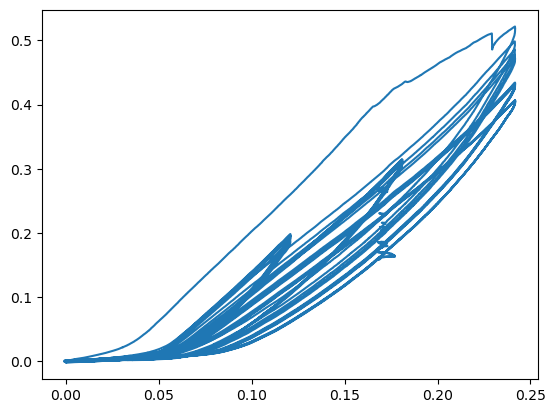

In [60]:
import matplotlib.pyplot as plt

x = df['Engineering Strain (A-axis) [/1]']
y = df['Engineering Stress (A-axis) [MPa]']

plt.plot(x,y)
plt.show()

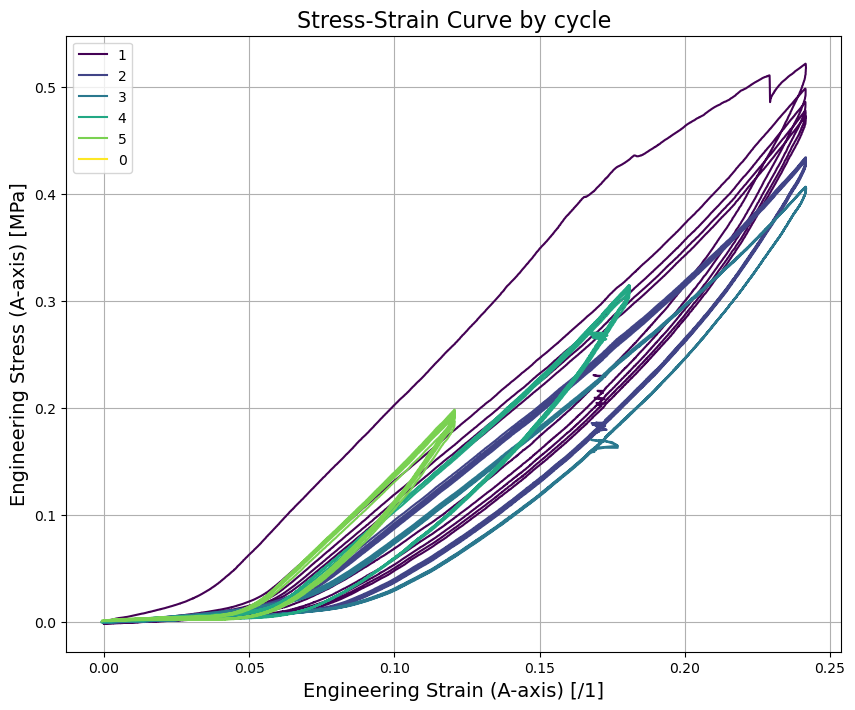

In [61]:
from matplotlib import colormaps
cmap = colormaps['viridis'] # https://matplotlib.org/stable/tutorials/colors/colormaps.html
cycle_list = df['Count Cycles'].unique()
colors = [cmap(i) for i in np.linspace(0, 1, len(cycle_list))]

plt.figure(figsize=(10,8))

for i, cycle in enumerate(cycle_list):
    df_cycle = df[df['Count Cycles'] == cycle]
    plt.plot(df_cycle['Engineering Strain (A-axis) [/1]'], df_cycle['Engineering Stress (A-axis) [MPa]'], label=cycle, color=colors[i])
plt.legend()
plt.xlabel('Engineering Strain (A-axis) [/1]', fontsize=14)
plt.ylabel('Engineering Stress (A-axis) [MPa]', fontsize=14)
plt.title('Stress-Strain Curve by cycle', fontsize=16)
plt.grid()
plt.show()